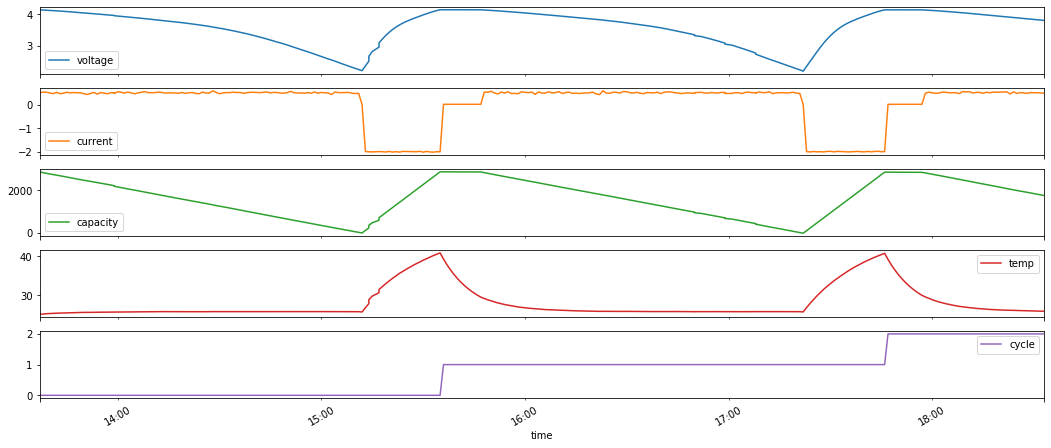

In [1]:
import pandas as pd
df=pd.read_csv('log1000.csv')
df.index=pd.to_datetime(df.time)
df=df.drop(['time'],axis=1)
df.index=df.index.to_period('1T')
a=df.head(300).plot(subplots=True,figsize=(18,8))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 131779 entries, 2019-11-21 13:37 to 2020-02-20 07:43
Freq: T
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   voltage   131779 non-null  float64
 1   current   131779 non-null  float64
 2   capacity  131779 non-null  float64
 3   temp      131779 non-null  float64
 4   cycle     131779 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 MB


In [3]:
df2=df[ (df.voltage>3.0) & (df.current>0.0)].groupby('cycle').agg(
    {
        'current': ['sum','max'],
        'voltage': ['max'],
    }
)

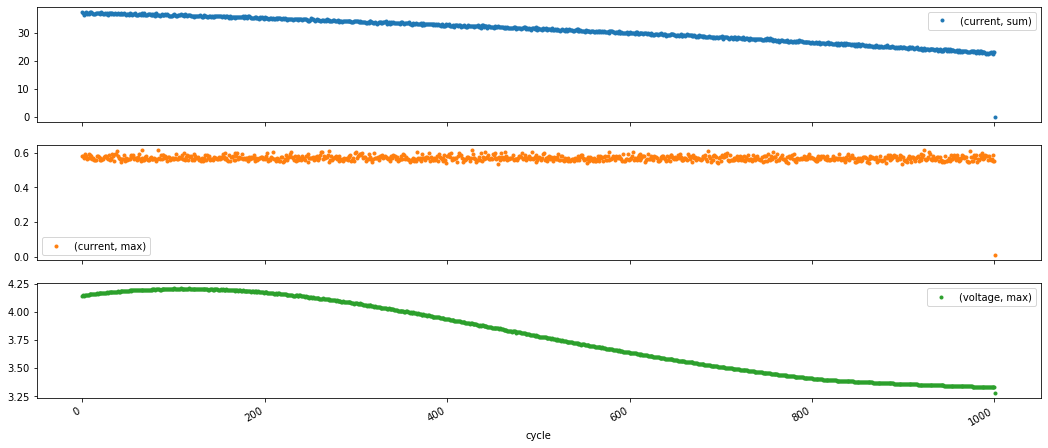

In [4]:
ax=df2.plot(style='.',subplots=True,figsize=(18,8))

In [ ]:
df['cap']=0
for i in df.iterrows():
    cycle=i[1].cycle
    cap=df2.loc[cycle]['current']['sum']*1000*60/3600
    df.loc[i[0],'cap']=cap

In [ ]:
a=df.plot(subplots=True,figsize=(18,8))

In [ ]:
cycle=i[1].cycle
df2.loc[cycle]['current']['sum']#[A.60S]
df2.loc[cycle]['current']['sum']*1000*60/3600

In [ ]:
import numpy as np
iv = df.loc[0:200,'voltage','current'].to_numpy()
def capacity_estimation(iv,delta=60):
    

In [ ]:
vi=df.iloc[0:200].loc[:,'voltage':'current'].to_numpy()
voltage=vi[:,0]
current=vi[:,1]

In [ ]:
import numpy as np
dv=np.gradient(voltage)
from matplotlib import pyplot as plt
plt.plot(dv)
plt.plot(voltage)
plt.plot(current)

In [ ]:
tc0=np.argmax(dv[:]>0) #time step to start charging
td0=np.argmax(dv[tc0:]<0) #time step to start discharging
tc1=np.argmax(dv[tc0+td0:]>0)
ti=tc0+td0
tf=tc0+td0+tc1
print(ti,tf)

In [ ]:
tcutoff=ti+np.argmax(voltage[ti:]<3.0)
tcutoff

In [ ]:
current[ti:tcutoff].sum()*1000*60/3600

In [ ]:
def get_capacity(voltage,current,vcutoff=3.0,delta=60):
    dv=np.gradient(voltage)
    tc0=np.argmax(dv[:]>0) #time step to start charging
    td0=np.argmax(dv[tc0:]<0) #time step to start discharging
    tc1=np.argmax(dv[tc0+td0:]>0)
    ti=tc0+td0
    tf=tc0+td0+tc1
    tcutoff=ti+np.argmax(voltage[ti:]<vcutoff)
    return current[ti:tcutoff].sum()*1000*60/3600

In [ ]:
vi=df.iloc[0:300].loc[:,'voltage':'current'].to_numpy()
voltage=vi[:,0]
current=vi[:,1]
get_capacity(voltage,current,vcutoff=3.0,delta=60)

In [ ]:
from requests import put, get
put('http://localhost:5000/1', data={'voltage': [1,2,3] }).json()


In [ ]:
{u'todo1': u'Remember the milk'}
get('http://localhost:5000/todo1').json()